In [ ]:
# MOHD MUTTALIB
# 9/19/2021

# Importing the libraries 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection Peocessing

In [28]:
# loading the csv data to Pandas Dataframe
gold_data=pd.read_csv('gold_price_data.csv')

In [29]:
# print First Five Rows DataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [30]:
# Print last Five Row DataFrame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [31]:
# Number of Rows and Columns
gold_data.shape

(2290, 6)

In [32]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [33]:
#Checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [34]:
# Getting the statistical of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation:
# 1: Positive correlation
# 2 :Negative correlation

In [35]:
correlation = gold_data.corr()

<AxesSubplot:>

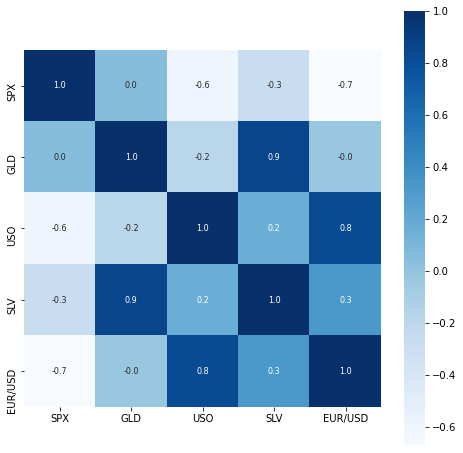

In [36]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [37]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\MOHD MUTTALIB\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

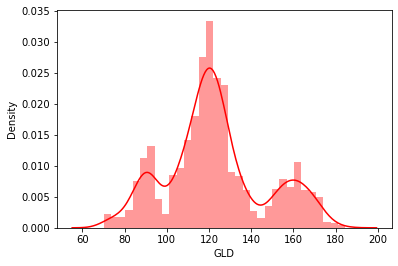

In [38]:
# Checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='red')

# Spliting the Features and Target 

In [39]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [40]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [41]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Spliting Into Training And Test Data 

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)

# Model Training
# Random Forest Regressor

In [44]:
regressor = RandomForestRegressor(n_estimators=100)

In [45]:
# Training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evalution

In [46]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [47]:
print(test_data_prediction)

[168.2764995   82.00869978 115.92869994 127.75220081 120.48680123
 154.58659711 150.23489788 126.17270049 117.3354987  126.19600017
 116.51610126 171.72200043 141.40879848 167.57979839 115.11120012
 117.70320016 140.68130204 169.78620059 159.13880275 159.98390004
 155.17939993 125.30140002 176.02749979 157.57620364 125.12930035
  93.99149977  77.76389999 120.54540041 119.07569882 167.4373996
  88.06710028 125.18890028  91.30570087 117.68990014 121.16389868
 136.7438012  115.40630095 114.9430007  147.27769942 107.11170092
 104.48240252  87.10089791 126.5311006  117.94240037 153.32189926
 119.6222003  108.35779954 107.99329824  93.12170037 127.05029783
  74.84360034 113.60479906 121.43580005 111.15279901 118.86799881
 120.69559938 158.61850015 167.97380035 146.96369686  85.98719874
  94.46509992  86.85129883  90.62079977 119.00970065 126.51890031
 127.5591001  170.40620032 122.27769953 117.38999878  98.59300046
 168.72430057 142.72849755 132.00840237 121.14380238 120.82509956
 119.630400

In [50]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error :",error_score)

R squared error : 0.9892451038101097


# Compare the Actual and Predicted Values in a plot

In [51]:
Y_test=list(Y_test)

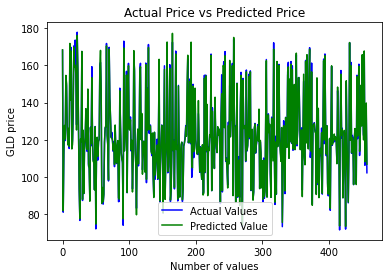

In [52]:
plt.plot(Y_test,color='blue',label='Actual Values')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()